In [1]:
from bgunfolding import Sampler, hist, hist_error
from bgunfolding import SVD
from bgunfolding.metrics import emd

import numpy as np
import matplotlib.pyplot as plt

# Read samples
s = Sampler()
s.read_sample('../data/sample_0.b')

# Load quantities of one sample
f, g, b, A, area_eff, acceptance, eff = s.load_one(i = 0)

Data succesfully read. (n_samples : 20)


/home/lars/.local/anaconda3/lib/python3.7/site-packages/fact/io.py:64: UserWarning: BLOSC compression for hdf5 not available, you will not be able to create or read blosc compressed datasets make sure tables and h5py are linked against the same hdf5 library e.g. by installing hdf5 in your system and doing  `pip install --no-binary=tables --no-binary=h5py tables h5py` or using conda
  'BLOSC compression for hdf5 not available, you will not be able'


In [21]:
svd = SVD(C = 'second_order', weighted = True)

In [22]:
svd.fit(f, g, b, A, area_eff, acceptance, eff)

In [25]:
# Uses L-Curve and Global Correlation Coefficients Criterion
d = svd.estimate_tau(tau_min = 0,
                       tau_max = 2,
                       n_tau = 100,
                       n_jobs = 1)

Text(0, 0.5, 'Global Correlation Coefficients')

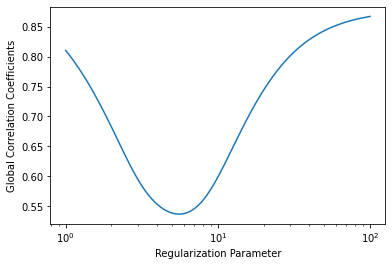

In [27]:
# Inspect Minimum
plt.plot(d['tau_space'], d['glob_cc'])
plt.xscale('log')
plt.xlabel('Regularization Parameter')
plt.ylabel('Global Correlation Coefficients')

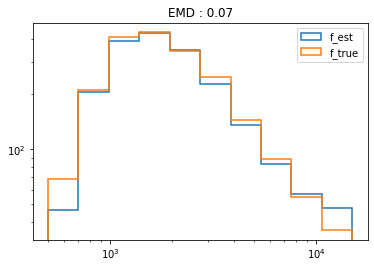

In [42]:
# Predict
f_est, cov, _, _ = svd.predict(d['tau_est'])

fig, ax = plt.subplots()

ax.set_title(f'EMD : {emd(f_est, f).round(2)}')
hist(ax, f_est, s.bins_true, label = 'f_est')
hist(ax, f, s.bins_true, label = 'f_true')

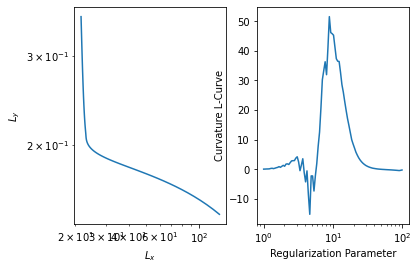

In [39]:
# L-Curve
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(d['lx'], d['ly'])
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlabel(r'$L_x$')
ax1.set_ylabel(r'$L_y$')

ax2.plot(d['tau_space'], d['curv'])
ax2.set_xlabel('Regularization Parameter')
ax2.set_ylabel('Curvature L-Curve')
ax2.set_xscale('log')